$$\require{cancel}$$
$$\require{separator}$$

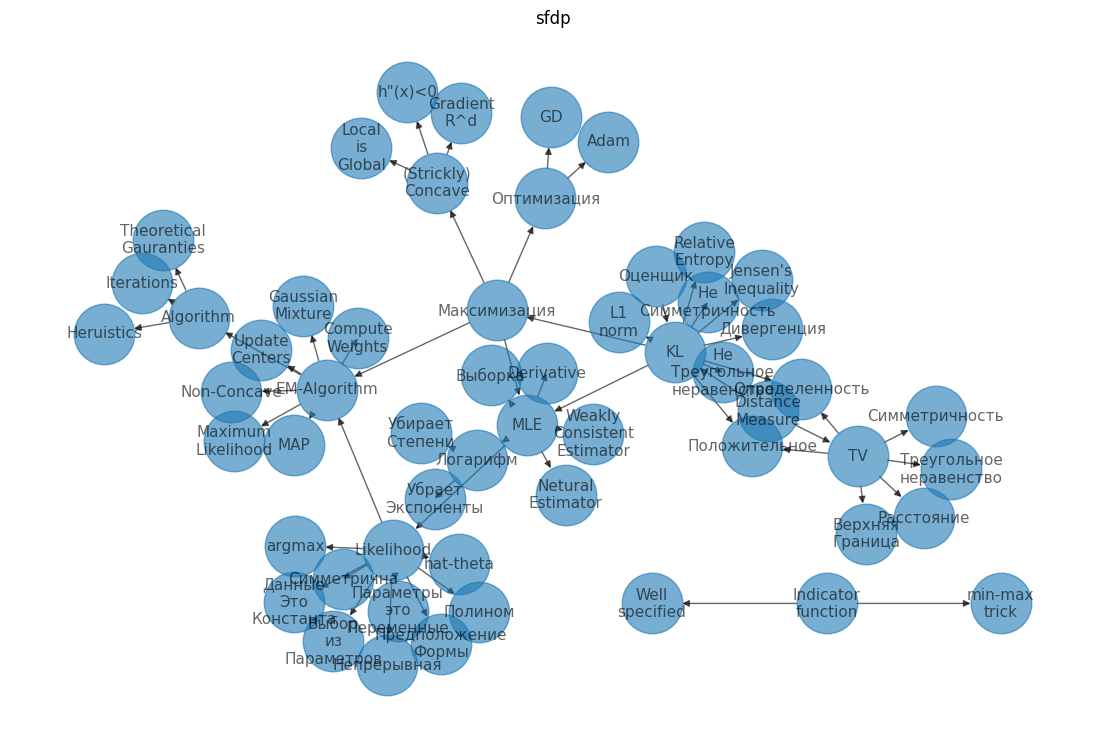

In [1]:
from knowledge import show_graph, showg, load, save, append
d = load('0308')
showg(d, figsize=(14,9), font_size=11)

# 1. Statistical properties of the MLE

**Objectives**
At the end of this lecture, you will be able to do the following:

- Derive the maximum likelihood estimator for the uniform statistical model and prove its consistency.
- Recognize that the maximum likelihood estimator is consistent.
- Compute the Fisher information of a statistical model
- Establish asymptotic normality of a maximum likelihood estimator and compute its asymptotic variance using Fisher information

# 2. Consistency of Maximum Likelihood Estimator

**Review: Definition of MLE**
Пускай у нас будет *Identifiable* стат. модель $\{E,(P_\theta)_{\theta\in\Theta}\}$ с выборкой iid $X_1,\dots,X_n$.
Мы предполагаем что модель *well-specified*, что значит что существует $\theta^*\in\Theta$ такое что $X_i\sim P_{\theta^*}$

Вспомним Kullback-Leibler (KL) divergance между двумя распределениями $P_{\theta^*}$ и $P_\theta$ с pdf $p_{\theta^*}$ и $p_\theta$ соотв. 
$$\displaystyle  \textsf {KL}\left(\mathbf{P}_{\theta ^*}, \mathbf{P}_{\theta }\right) = \mathbb {E}_{\theta ^*}\left[\ln \left(\frac{p_{\theta ^*}(X)}{p_{\theta }(X)}\right)\right],$$
и consistent до константы оценщик $\theta\to\textsf{KL}(\mathbf{P}_{\theta ^*}, \mathbf{P}_{\theta })$:
$$\displaystyle  \widehat{\text {KL}}_ n\left(\mathbf{P}_{\theta ^*}, \mathbf{P}_{\theta }\right) - \text {constant} = - \frac{1}{n} \sum _{i=1}^{n} \ln p_{\theta }(X_ i).$$

Вспомним как определяется MLE:\
$\begin{align}
\hat\theta_n^{\text{MLE}}&=\text{argmax}_{\theta\in\Theta}\widehat{\text{KL}}_n(\mathbf{P}_{\theta ^*}, \mathbf{P}_{\theta })\\
&=\displaystyle \text {argmin}_{\theta \in \Theta }\left( \text {Constant} - \frac{1}{n} \sum _{i=1}^{n} \ln p_{\theta }(X_ i)\right)\\
&=\displaystyle \text {argmax}_{\theta \in \Theta }\left(\frac{1}{n} \sum _{i=1}^{n} \ln p_{\theta }(X_ i)\right)\qquad (\text {drop additive constant and negative sign)})\\
&=\displaystyle \text {argmax}_{\theta \in \Theta } \left(\sum _{i=1}^{n} \ln p_{\theta }(X_ i)\right)\qquad (\text {drop positive scaling factor})\\
&=\displaystyle \text {argmax}_{\theta \in \Theta }\left(\ln \left(\prod _{i=1}^{n} p_{\theta }(X_ i)\right)\right)\qquad (\text {log property})\\
&=\displaystyle \text {argmax}_{\theta \in \Theta } \ln \left( L_ n(X_1,X_2,\ldots , X_ n; \theta )\right)\qquad (\text {definition of likelihood}).
\end{align}$

У нас есть MLE и два способы его вычислить 
- **производную прировнять к нулю**
- посмотреть на график

Теперь возникает вопрос - а это хороший оценщик?
- смещенные ли он?
- какой него variance?
- маленький ли у него Quandratic Risk?
- консистентный ли он?
- Асимптотически нормальный ли он?
все те вещи которым мы могли сказать об оценщики был в виде функции или просто средним из данных, можно ли все это сказать о MLE?

Говориться что под слабой регуляторными условиями он консистентный.
А что значат эти "слабые регулирующие условия"? вообще все модели которые мы будем рассматривать в этой серии лекций - будут удовлетворять этим словиям.\
Эти условия удовлетворяются конечным параметрам.\
И еще это занчит что мы может подсчитать LogLikelihood и прировнять производную к нулю и найтие $\hat\theta_\text{MLE}$ без того чтобы сломать какие-то математические правила.
**То есть есть ситуации когда нельзя взять производную.**


**Консистентность MLE**
- начнем с того что $X$ - это R.V.
- значит и функция от $X$ $Y_i=h(X_i)$ - R.V.

В соотв с LLN которому всеравно на распределение случайной переменной. можно сказать что в соотв. LLN:
$$\displaystyle\bar{Y}_n\xrightarrow[n\to\infty]{\mathbb{P}/\text{a.s.}}\mathbb{E}[h(Xi)]$$
И тот факт как мы определили $Y_i$ то это тоже самое что:
$$\frac{1}{n}\sum h(x)\xrightarrow[n\to\infty]{\mathbb{P}/\text{a.s.}}\mathbb{E}[h(Xi)]$$
А если мы заменим $h=\log(p_\theta(X))$? и у нас есть выборка $X_1,\dots,X_n\stackrel{iid}\sim\mathbb{P}_\theta^*$
тогда уравнение приобретает вид:
$$\frac{1}{n}\sum \log(p_\theta(x))\xrightarrow[n\to\infty]{\mathbb{P}/\text{a.s.}}\mathbb{E}[\log(p_\theta(X_i))]$$

>по определению log-likelihood\
>$L(X_1,\dots,X_n)=\prod_{i=1}^n p_\theta(x_i)$\
>$\log L(X_1,\dots,X_n)=\sum_{i=1}^n \log(p_\theta(x_i))$

тогда в соотв с определением
$$\frac{1}{n}\log L(X_1,\dots,X_n,\theta)\xrightarrow[n\to\infty]{\mathbb{P}/\text{a.s.}}\mathbb{E}_{\theta^*}[\log(p_\theta(X_i))]$$

тогда вспомним определение $\widehat{KL}$ которое мы описали выше и замени ожидание на log likelihood и получим выражение которое приравниваем KL Дивергенцию и Log Likelihood.

$$\begin{align}
\frac{1}{n}\log L(X_1,\dots,X_n,\theta) &\quad\quad\xrightarrow[n\to\infty]{\mathbb{P}}&\text {constant}-\widehat{\text {KL}}_ n\left(\mathbf{P}_{\theta ^*}\| \mathbf{P}_{\theta }\right)\\
\color{lightgray}{\rule{1.5cm}{0.4pt}\textit{ Л.Ч. }\rule{1.5cm}{0.4pt}} &  & \color{lightgray}{\rule{1.5cm}{0.4pt}\textit{ П.Ч }\rule{1.5cm}{0.4pt}}\\
\end{align}$$

| *Левая часть* | *Правая часть* | 
|:---:|:-:|
| это есть $\frac{\text{log likelihood}}{n}$ которая максимизируется $\hat{\theta}^{\text{MLE}}$ | $\text {constant}-\widehat{\text {KL}}_ n\left(\mathbf{P}_{\theta ^*}\|\mathbf{P}_{\theta }\right)$ - она будет максимизированная когда $\mathbf{P}_{\theta ^*}=\mathbf{P}_{\theta }$ потому что наша модель "well specified" так что $\theta=\theta^*$ максимизирует Л.Ч. |

Некоторый технических условия (какие?) позволяют нам утверждать следующую теорему

$$\fbox{ $\hat\theta^{\text{MLE}}_n\xrightarrow[n\to\infty]{\mathbb{P}}\theta^*$
MLE $\theta$ есть консистентный(слабый) оценщик $\theta$}$$

То есть: **Maximum Likelihood estimator $\theta$ есть консистентный (слабый) оценщик $\theta$**

$$\frac{1}{n}\log L(X_1,\dots,X_n,\theta)\xrightarrow[n\to\infty]{\mathbb{P}}\text{constant}-\widehat{\textsf{KL}}(\mathbb{P}_{\theta^*}\|\mathbb{P}_\theta)$$

Суть в том при $n\to\infty$ волнистый график перестает асцелировать сильно. Эти графики становяться ближе и ближе к друг другу. Но на самом деле - нам важно чтобы $\theta$ была как можно ближе к $\theta^*$ на оси $X$
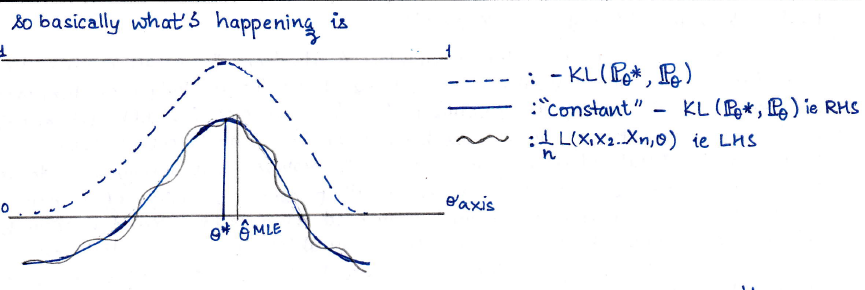


[вспомним что в какой-то момент мы заменили ожидание средней](Unit3-Lecture-06%20Measures%20of%20Distance%20Between%20Probability%20Distributions.ipynb#Maximum-Likelihood)

# 3. Fisher Information

Мы установили что MLE очень мощный метод. Каждый раз когда у нас есть PDF или PMF мы можем написать к нему likelihood или их log likelihood, максимизировать оценщик.

Что еще хорошо это семейство оценок, что эти методы оценки идут с теоретической гарантией что они сойдутся. Мы уже убедились что Log Likelihood консистентный оценщик для const-KL.

Также мы знаем что MLE, при средних регуляциях условиях будет консистентным оценщиков для истинного параметра который мы ищем, в случае well-specified model.
**maximum likelihood estimator It is consistent.**

Что насчет asymptotic property?
Оказывается что MLE также **asymptotically normal under mild regularity conditions.**

Что мы имеев ввиду под этим?
Если взять данные, что использовались для MLE, убрать * от $\theta^*$, перемасштабировать на $\sqrt{n}$, как мы это делали для CLT. Конечно MLE не является Средним, но у нас все равно будут по итогу будет **Asymptotic Normality**.

Все что нам остается так это сказать **Асимптотическое распределение** и какое **Асимптотическая Дисперсия**?

Среднее - всегда будет нулем.
А чему будет равна асимптотическая дисперсия?

Оказывается что она равная $$\dfrac{1}{\text{Fisher Information}}$$

**Что такое Fisher Infromation?**

Оказывается что она основывается на Log Likelihood но только для одного наблюдения.

$$n=1$$, 
$$\ell(\theta)=L_1(X_1,\theta) ,\quad \theta\subset\mathbb{R}$$

Где $L_1(X_1,\theta)=f_\theta(X_1)$ или $L_1(X_1,\theta)=p_\theta(X_1)$  это PDF или PMF

Мы предполагаем что $\ell$ как функцию можно дважды дифференцировать по $\theta$. Под некоторыми Regularity Conditions (there are some conditions associated to switching expectations and derivatives), Fisher Information стат. модели определяется как 

$$\displaystyle\mathcal{I}(\theta ) = \text{var}(\ell'(\theta))=-\mathbb E\left[\ell ^{\prime \prime }(\theta )\right]$$

Информация фишера представляет нам как, в среднем, изогнута функций $\theta\mapsto \ln L(x_1, \theta)$. потому что одно из ее определение это $\mathcal{I}(\theta ) = -\mathbb {E}[\ell ^{\prime \prime }(\theta )]$. так как вторая производная измеряет выпуклость или вогнутость, соотв $\mathcal{I}(\theta )$ измеряет *среднее* изгибание функции. 

Так же FI говорит как изогнута (в среднем) и Log -Likelihood $\ln L_n(x_1, \dots,x_n,\theta)$ для нескольких выборок $X_1=x_1,\dots,X_n=x_n$ в том числе. В частности $\mathcal{I}(\theta^*)$ говорит как искревлена (в среднем) log-likelihood в области близкой к истенному параметру.
Как правило, на практике, если FI $\mathcal{I}(\theta^*)$ большая, тогда мы ожидаем что MLE даст хорошую оценку для $\theta^*$.

In [2]:
append(d, 'MLE','Fisher Information')
# append(d, 'MLE','wellspecified')

append(d, 'Fisher Information', 'Double Derivative')
append(d, 'Fisher Information', 'Количество Информации')
# append(d, 'Fisher Information', 'wellspecified')
append(d, 'Fisher Information', 'X_1')
append(d, 'Cramer–Rao bound','Fisher Information')
append(d, 'Оценщик', 'Оценка')
append(d, 'Оценка', 'Выборка')
append(d, 'Скорость сходимости', 'Оценка')
append(d, 'Распределение оценки', 'Оценка')

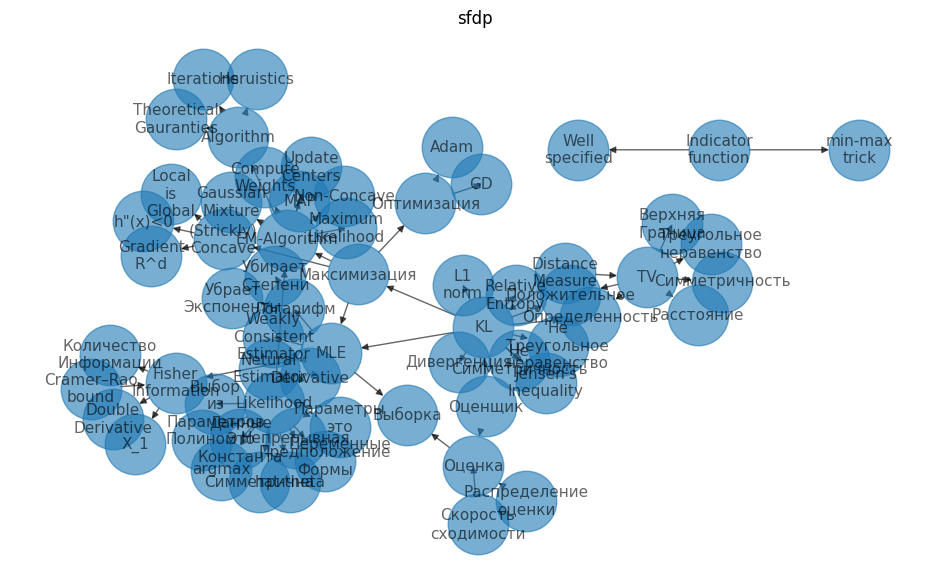

In [3]:
showg(d)

# 4. Equivalence between the two definitions of Fisher Information


В этот раз мы поговорим почему, это равенство верно.

$$\displaystyle\mathcal{I}(\theta ) = \text{var}(\ell'(\theta))\color{red}{=}-\mathbb E\left[\ell ^{\prime \prime }(\theta )\right]$$

$f_\theta(x)$ это PDF\
что это значит?\
$$\displaystyle\int f_\theta(x)\partial x=1 \Rightarrow \frac{\partial}{\partial\theta}\int f_\theta(x)\partial x=\int\frac{\partial}{\partial\theta}f_\theta(x)\partial x= 0$$

Это равно нулю, потому что PDF равно 1, а это константа и она не зависит от $\theta$ следовательно - производная от константы равна 0. Мы запомним это условие как $*$ и будем к нему обращаться.

https://learning.edx.org/course/course-v1:MITx+18.6501x+1T2024/block-v1:MITx+18.6501x+1T2024+type@sequential+block@u03s04_methodestimation/block-v1:MITx+18.6501x+1T2024+type@vertical+block@u03s04_methodestimation-tab4

Теперь мы ходим подсчитать $\text{var}(\ell'(\theta))$ и $-\mathbb E\left[\ell ^{\prime \prime }(\theta )\right]$ и проверить если они равны.


1) подсчитаем производную

$\displaystyle \ell'(\theta)=\frac{\partial}{\partial\theta}\log f_\theta(x)=\dfrac{\frac{\partial}{\partial\theta}\log f_\theta(x)}{f_\theta(x)}$

$\displaystyle \ell''(\theta)=
    \dfrac{
         \frac{\partial^2}{\partial\theta^2} f_\theta(x) \cdot f_\theta(x)
        -\frac{\partial  }{\partial\theta  } f_\theta(x) \cdot f_\theta(x)
        }{f_\theta(x)^2}\\
=\dfrac
    {\frac{\partial^2}{\partial\theta^2} f_\theta(x)}
    {f_\theta(x)}
-\left(
 \dfrac
    {\frac{\partial}{\partial\theta} f_\theta(x)}
    {f_\theta(x)^2}\right)^2$
    
    
$\text{var}[\ell'(\theta)]=\mathbb{E}[(\ell'(\theta))^2]-(\mathbb{E}[\ell'(\theta)])^2\\
=\int
\left(\dfrac
    {\frac{\partial^2}{\partial\theta^2} f_\theta(x)}
    {f_\theta(x)}
\right)f_\theta(x)\partial x
-\left(
 \int
     \dfrac
        {\frac{\partial}{\partial\theta} f_\theta(x)}
        {\cancel{f_\theta(x)^2}}
     \cancel{f_\theta(x)}\partial x
\right)^2\\
=\int
\left(\dfrac
    {\frac{\partial^2}{\partial\theta^2} f_\theta(x)}
    {f_\theta(x)}
\right)f_\theta(x)\partial x
-\cancel{\left(
 \int
     \frac{\partial}{\partial\theta} f_\theta(x)\partial x
\right)^2}_{= 0\,(*)}\\
=\int
\left(\dfrac
    {\frac{\partial^2}{\partial\theta^2} f_\theta(x)}
    {f_\theta(x)}
\right)f_\theta(x)\partial x$
где

$$\fbox{$\mathcal{I}(\theta)=\int\left(\dfrac{\frac{\partial^2}{\partial\theta^2} f_\theta(x)}{f_\theta(x)}\right)f_\theta(x)\partial x$}$$

$\displaystyle{-\mathbb{E}[\ell''(\theta)]=-\mathbb{E}\left[\dfrac
    {\frac{\partial^2}{\partial\theta^2} f_\theta(x)}
    {f_\theta(x)}
-\left(
 \dfrac
    {\frac{\partial}{\partial\theta} f_\theta(x)}
    {f_\theta(x)^2}\right)^2\right]\\
=-\int
\left(\dfrac
    {\frac{\partial^2}{\partial\theta^2} f_\theta(x)}
    {\cancel{f_\theta(x)}}
\right)\cancel{f_\theta(x)\partial} x
-\left(
 \int
     \dfrac
        {\frac{\partial}{\partial\theta} f_\theta(x)}
        {f_\theta(x)^2}
     \right)^2f_\theta(x)\partial x\\
=-\int
    \frac{\partial^2}{\partial\theta^2} f_\theta(x)\partial x
-
\int
     \dfrac
        {\left(\frac{\partial}{\partial\theta} f_\theta(x)\right)^2}
        {f_\theta(x)}\partial x
- \cancel{\frac{\partial^2}{\partial\theta^2}
    \int f_\theta(x)}\partial x_{=\,0\,(*)}\\
=\int
     \dfrac
        {\left(\frac{\partial}{\partial\theta} f_\theta(x)\right)^2}
        {f_\theta(x)}\partial x=\mathcal{I}(\theta)
}
$

# 5. Examples of Fisher Information Computation

Есть два варианта  подсчитать
- подсчитать вторую производную, взять ее мат. ожидание, и приписать - перед ним.
- подсчитать первыую производную и подсчитать дисперсию

Лушче всегод - первый варинат, иначе - это **"откладывание проблемы на потом"**

**Fisher Information of the Bernoulli Random Variable**

$X\sim\text{Ber}$ $\ell(p)=$\
$f_p(x)=p^{x}(1-p)^{1-x}$\
$\ell(p)=x\log{P}+(1-x)\log(1-p)$\
$\begin{align}
\ell'(p)&=\frac{x}{p}-\frac{1-x}{1-p} & \color{blue}{\text{var}[\ell'(p)]}&=\frac{1}{1-p}\\
\ell''(p)&=-\frac{x}{p^2}+\frac{1-x}{(1-p)^2} & -\color{green}{\mathbb{E}[\ell''(p)]}&=\frac{1}{1-p}
\end{align}$


$\color{blue}{\displaystyle\text{var}[\ell'(p)]=\text{var}\left(\frac{x}{p}-\frac{1-x}{1-p}\right)}$
мы хотим получить выражнеие типа $AX+b$ чтобы из него получить выражнеие $\text{var}(AX+B)=A^2\text{var}(X)$

вынесем $x$ за скобки, чтобы поулчим

$\displaystyle
{
\,=\text{var}\left(x\frac{1}{p}-(\frac{1}{1-p}-\frac{x}{1-p})\right)\\
\,=\text{var}\left(x\frac{1}{p}-\frac{1}{1-p}+x\frac{1}{1-p}\right)\\
\,=\text{var}\left(x\left(\frac{1}{p}+\frac{1}{1-p}\right)-\frac{1}{1-p}\right)
}
$

Мы выносим все что не зависит но умнажается на X за скобки, возведя в квадрат. а то что прибавляется к X - просто исчезает.

$\displaystyle{
~=\text{var}\left(x\left(\frac{1}{p}+\frac{1}{1-p}\right)-\cancel{\text{"const"}}\right)\\
~=\text{var}\left(x\left(\frac{1(1-p)}{p}+\frac{1p}{1-p}\right)\right)\\
~=\text{var}\left(x\left(\frac{1-\cancel{p}+\cancel{p}}{p(1-p)}\right)\right)\\
~=\text{var}\left(\frac{x}{p(1-p)}\right)
}$

Мы знаем чему равна дисперсия $\text{var}(X)=p(1-p), X\sim\text{Ber}(p)$\
$\displaystyle{
~=\frac{\text{var}(x)}{(p(1-p))^2}\\
~=\frac{p(1-p)}{p^2(1-p)^2}\\
~=\frac{1}{p(1-p)}
}$

Тут мы воспользуемся линейными свойствами мат. ожидания
$\displaystyle{
-\color{green}{\mathbb{E}[\ell''(p)]}=-\mathbb{E}\left[-\frac{x}{p^2}+\frac{1-x}{(1-p)^2}\right]\\
~=-\frac{\mathbb{E}[x]}{p^2}+\frac{1-\mathbb{E}[x]}{(1-p)^2}\\
~=-\frac{\cancel{p}}{p^\cancel{2}}+\frac{\cancel{1-p}}{(1-p)^\cancel{2}}\\
~=-\frac{1}{p}+\frac{1}{(1-p)}\\
~=-\frac{1}{(1-p)}
}$



**Fisher Information of the Binomial Random Variable**

Let $X$ be distributed according to the binomial distribution of $n$ trials and parameter $p \in (0,1)$ . Compute the Fisher information $\mathcal{I}(p)$.

The logarithm of the pmf of a binomial random variable $X$, treated as a random function, can be written as
$$\displaystyle  \ell (p) \triangleq \ln {n \choose X} + X \ln p + (n-X) \ln (1-p), ~ ~ ~  X \in \{ 0,1,\dots ,n\} .$$
The derivative of $ \ell (p) $ with respect to $p$ is

$$\displaystyle  \ell '(p) = \frac{X}{p} - \frac{n-X}{1-p},$$

which means the second derivative is

$$\displaystyle  \ell ^{\prime \prime }(p) = -\frac{X}{p^2} - \frac{n-X}{(1-p)^2}.$$

The Fisher information $\mathcal{I}(p)$, therefore, is
$$\displaystyle = \mathbb E\left[\frac{X}{p^2} + \frac{n-X}{(1-p)^2}\right]\\
\displaystyle = \frac{np}{p^2} + \frac{n-np}{(1-p)^2}\\
\displaystyle = \frac{n}{p(1-p)}\\
$$


**Fisher Information of a Poisson Random Variable**


Consider the Poisson statistical model $\text {Pois}(\lambda )$. What is the Fisher information $\mathcal{I}(\lambda )$?

In a Poisson model, the log likelihood for one observation $X \in \mathbb {Z}_{\geq 0}$ is

$$\ell (\lambda ) := \log \left( \frac{\lambda ^ X}{X!} e^{-\lambda }\right).$$

The second derivative is
$$\ell ^{\prime \prime }(\lambda ) = -X/\lambda ^2.$$
The Fisher information is
$$\mathcal{I}(\lambda ) = -\mathbb E[ \ell ^{\prime \prime }(\lambda ) ] = 1/\lambda .$$



### Асимптотическая нормальность: развернутое объяснение

**Определение:**
Асимптотическая нормальность — это свойство статистической оценки, при котором ее распределение приближается к нормальному по мере увеличения размера выборки.

#### Основные понятия и определения:

1. **Выборка:**
   - Пусть $X_1, X_2, \ldots, X_n$ — независимые наблюдения из распределения с плотностью $f(x; \theta)$, где $\theta$ — неизвестный параметр.
   - Пример: если $X_i$ нормальны с математическим ожиданием $\mu$ и дисперсией $\sigma^2$, то $\theta = (\mu, \sigma^2)$. Тоесть, это вектор с двумя элементами. а пространство параметров принадлежить $\mathbb{R}\times\mathbb{R}_+$

2. **Оценка:**
   - Оценка $\hat{\theta}_n$ — это функция от данных $(X_1, X_2, \ldots, X_n)$, используемая для приближенного нахождения истинного значения параметра $\theta^*$. Соответственно $\theta(X_1, \dots,X_n)\mapsto\mathbb{R}\times\mathbb{R}_+$
   - Пример: среднее арифметическое выборки $ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $ — оценка матожидания $\mu$.

3. **Скорость сходимости:**
   - Скорость сходимости показывает, насколько быстро оценка приближается к истинному значению по мере увеличения $n$.
   - Пример: оценка имеет скорость сходимости $\sqrt{n}$, если $ \sqrt{n} (\hat{\theta}_n - \theta^*) $ сходится к некоторому пределу.

4. **Распределение оценки:**
   - Оценка $\hat{\theta}_n$ имеет собственное распределение, которое может быть неизвестным или сложным в аналитическом вычислении.
   - **Пример:**
     - Если $X_i$ нормальны с матожиданием $\mu$ и дисперсией $\sigma^2$, то:
     $$     \bar{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right).
     $$
#### Теорема об асимптотической нормальности (ЦПТ)

**Центральная предельная теорема (ЦПТ):**
- ЦПТ утверждает, что при достаточно большом $n$ среднее арифметическое выборки $ \bar{X} $ будет приближенно нормально распределено, независимо от распределения исходных данных.
- Формулировка:
  Пусть $X_1, X_2, \ldots, X_n$ — независимые и одинаково распределенные случайные величины с матожиданием $ \mu $ и дисперсией $ \sigma^2 $. Тогда:
  $$  \sqrt{n} \left( \bar{X} - \mu \right) \xrightarrow{d} N(0, \sigma^2),
  $$  где $\xrightarrow{d}$ обозначает сходимость по распределению.

**Интуитивное понимание:**
- Когда мы усредняем значения случайных величин, суммарное влияние отклонений отдельных величин от среднего уменьшается.
- Результат говорит, что независимо от исходного распределения данных, среднее арифметическое при большом $n$ будет нормально распределено.

#### Асимптотическая нормальность ОМП

**Метод максимального правдоподобия:**
- **Оценка методом максимального правдоподобия (ОМП):**
  - Пусть $X_1, X_2, \ldots, X_n$ — независимые наблюдения.
  - Функция правдоподобия:
  $$  L(\theta) = \prod_{i=1}^{n} f(X_i; \theta). $$  - Логарифм функции правдоподобия:
  $$  \ell(\theta) = \sum_{i=1}^{n} \log f(X_i; \theta).$$  - Оценка ОМП $\hat{\theta}_n$ определяется как:
  $$  \hat{\theta}_n = \arg \max_{\theta} \ell(\theta).$$

**Теорема об асимптотической нормальности ОМП:**
- Оценка методом максимального правдоподобия асимптотически нормальна при выполнении определенных условий.
- Формулировка:
  Если истинный параметр $\theta^*\in\Theta$ принадлежит внутренности пространства параметров, и выполнены некоторые условия регулярности (условия Крамера-Рао), то:
  $$  \sqrt{n} (\hat{\theta}_n - \theta^*) \xrightarrow{d} N\left(0, \frac{1}{I(\theta^*)}\right),
  $$  где $ I(\theta^*) $ — информация Фишера в точке $\theta^*$.

**Условия регулярности:**
- Для корректности асимптотической нормальности требуется, чтобы модель была **well-specified** (хорошо заданной):
  - **Правильная спецификация модели:** предполагается, что модель корректно описывает данные, и истинный параметр $\theta^*$ действительно лежит в пространстве параметров $\Theta$.
  - **Условия регулярности:**
    - **Идентифицируемость:** каждый параметр модели должен соответствовать уникальному распределению данных.
    - **Дифференцируемость:** функция правдоподобия должна быть дважды дифференцируема по параметру.
    - **Информация Фишера не равна нулю:** информация Фишера должна быть положительной, чтобы обеспечить точность оценки.
    - **Непрерывность производных:** производные функции правдоподобия должны быть непрерывны и ограничены.

**Информация Фишера:**
- **Определение:**
  $$  I(\theta) = -\mathbb{E} \left[ \frac{\partial^2}{\partial \theta^2} \ell(\theta) \right],
  $$  или эквивалентно:
  $$  I(\theta) = \mathbb{E} \left[ \left( \frac{\partial}{\partial \theta} \ell(\theta) \right)^2 \right].
  $$- Информация Фишера характеризует количество информации о параметре, содержимое в наблюдениях.

**Интуитивное понимание теоремы об асимптотической нормальности ОМП:**
- Разность $ \hat{\theta}_n - \theta^* $ приближается к нулю, но при умножении на $\sqrt{n}$ остается не нулевой и приобретает нормальное распределение.
- Таким образом, распределение оценки ОМП становится все ближе к нормальному с увеличением объема данных.

**Пример использования асимптотической нормальности ОМП:**

- **Пример:**
  Пусть $X_1, X_2, \ldots, X_n$ — независимые наблюдения из нормального распределения $N(\mu, \sigma^2)$, где $\sigma^2$ известно.
  Оценка ОМП для $\mu$ — среднее выборки $\bar{X}$:
  $$  \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i.
  $$  **Информация Фишера:**
  $$  I(\mu) = \frac{n}{\sigma^2}.
  $$  **Асимптотическое распределение оценки:**
  $$  \sqrt{n} (\bar{X} - \mu) \xrightarrow{d} N(0, \sigma^2),
  $$  или эквивалентно:
  $$  \bar{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right),
  $$  что подтверждает теорему об асимптотической нормальности.

### Заключение

Асимптотическая нормальность — это важное свойство статистических оценок, позволяющее аппроксимировать их распределение нормальным при большом количестве наблюдений. Оно обеспечивает теоретическую основу для вычисления доверительных интервалов и тестирования гипотез в статистике.

### Векторный случай: Многомерная асимптотическая нормальность

Когда $\theta$ является вектором параметров, теорема об асимптотической нормальности ОМП распространяется на многомерные случаи следующим образом:

1. **Вектор параметров:**
   - Пусть $\theta = (\theta_1, \theta_2, ..., \theta_k)$ — вектор неизвестных параметров размерности $k$.

2. **Оценка параметров:**
   - Оценка $\hat{\theta}_n = (\hat{\theta}_{n,1}, \hat{\theta}_{n,2}, ..., \hat{\theta}_{n,k})$ также является вектором, состоящим из оценок каждого отдельного параметра.

3. **Многомерная асимптотическая нормальность:**
   - При увеличении объема выборки $n$, вектор разностей $ \sqrt{n} (\hat{\theta}_n - \theta^*) $ сходится по распределению к многомерному нормальному распределению:
   $$   \sqrt{n} (\hat{\theta}_n - \theta^*) \xrightarrow{d} N_k(0, \Sigma),$$   где $N_k(0, \Sigma)$ — многомерное нормальное распределение с центром в нуле и ковариационной матрицей $\Sigma$.

4. **Ковариационная матрица:**
   - Ковариационная матрица $\Sigma$ определяется как обратная матрица информации Фишера:
   $$   \Sigma = \left[I(\theta^*)\right]^{-1},$$   где $I(\theta^*)$ — матрица информации Фишера, вычисленная в точке истинного параметра $\theta^*$.

### Пример с многомерным нормальным распределением

Пусть $X_1, X_2, ..., X_n$ — независимые наблюдения из многомерного нормального распределения $N(\mu, \Sigma)$, где $\mu$ — вектор средних, а $\Sigma$ — ковариационная матрица. Оценка ОМП для $\mu$ будет средним по всем наблюдениям:
$$\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i.$$
Тогда, согласно теореме об асимптотической нормальности:
$$\sqrt{n} (\bar{X} - \mu) \xrightarrow{d} N_k(0, \Sigma),
\]
где $N_k(0, \Sigma)$ указывает на многомерное нормальное распределение с ковариационной матрицей $\Sigma$, идентичной ковариационной матрице исходного распределения.

### Заключение

Распределение векторной оценки $\hat{\theta}_n$ при больших $n$ будет многомерным нормальным, что позволяет использовать многомерные статистические методы для анализа оценок и их свойств. Это обобщение одномерного случая на многомерный дает глубокое понимание свойств оценок в м

# 6. Asymptotic normality of the maximum likelihood estimator


Возмем во внимание экспоненциальную стат модель с $f_\lambda (x) = \lambda e^{-\lambda x}, x \ge 0$ и $\lambda \in (0,\infty )$. Вторая производная  $\ell (\lambda )$, которая равна $\mathbf{H}\ell (\lambda ) = \ell ^{\prime \prime }(\lambda )$, не зависит от $x$ и показана на след графике.
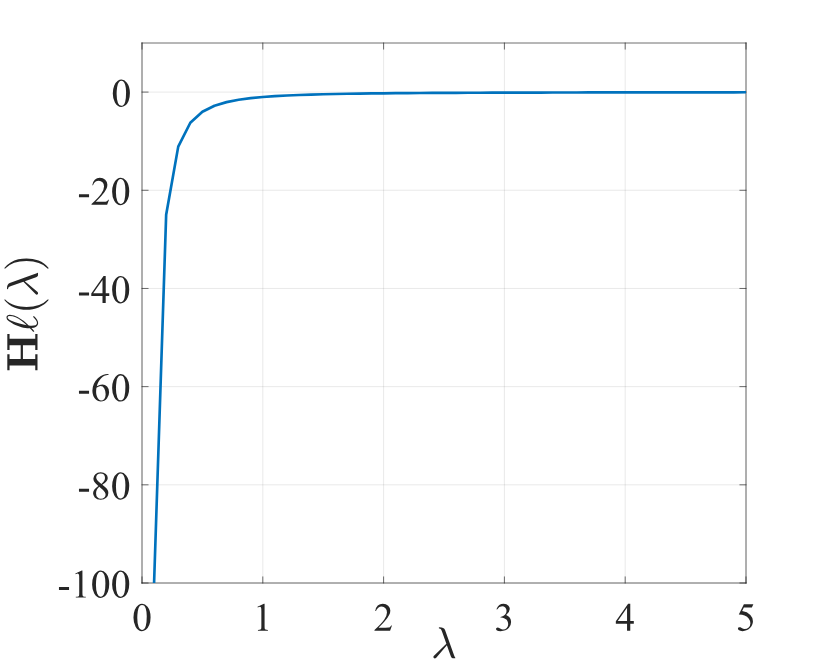
*$\ell ^{\prime \prime } (\lambda )$ для эксп стат. модели с параметром $\lambda$  for all $X$.*


The Fisher information, $\mathcal{I}(\theta ) = -\mathbb E[\mathbf{H}\ell (\theta )]$ , captures the negative of the expected curvature of $\ell (\theta )$. For example, for the exponential statistical model, the expected curvature of $\ell(\lambda )$ is $\ell ^{\prime \prime }(\lambda )$ itself and this is shown in the figure above. The Fisher information in this case is always positive. The fact that $\ell ^{\prime \prime }(\lambda )$ is negative for all $x$ also means that the log-likelihood function $\ell (\lambda )$ is a concave function of $\lambda$ for all $x$.

If we consider the Bernoulli statistical model with parameter $p \in (0,1)$, we derived in a lecture video (also can be seen in the slides) that
$$\displaystyle  \ell ^{\prime \prime }(p) = -\frac{X}{p^2} - \frac{1-X}{(1-p)^2}, ~ ~ ~  X \in \{ 0,1\} .$$
Here, we see that $\ell ^{\prime \prime }(p)$ is a random function that depends upon $p$. The following two figures show $\ell ^{\prime \prime }(\lambda )$  for $X=0$ and $X=1$.

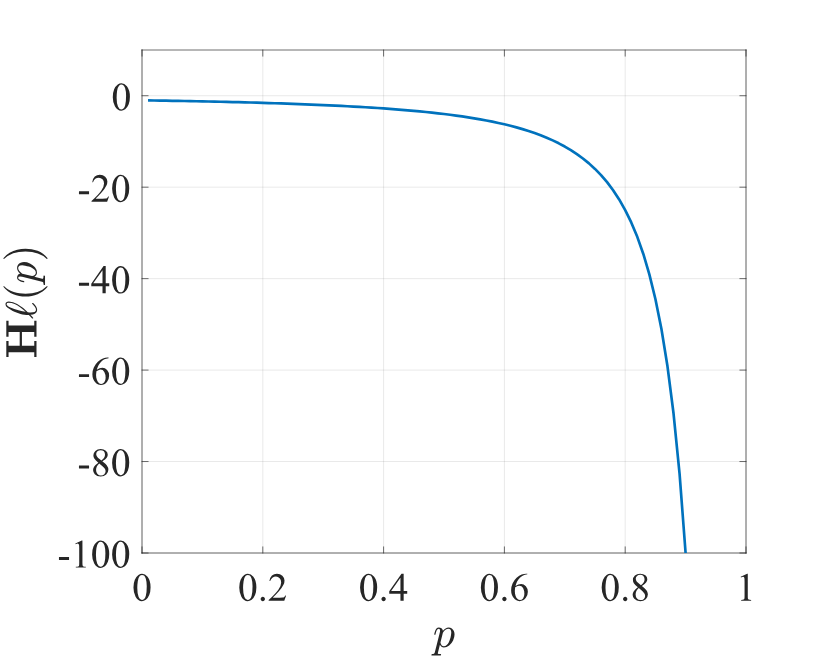

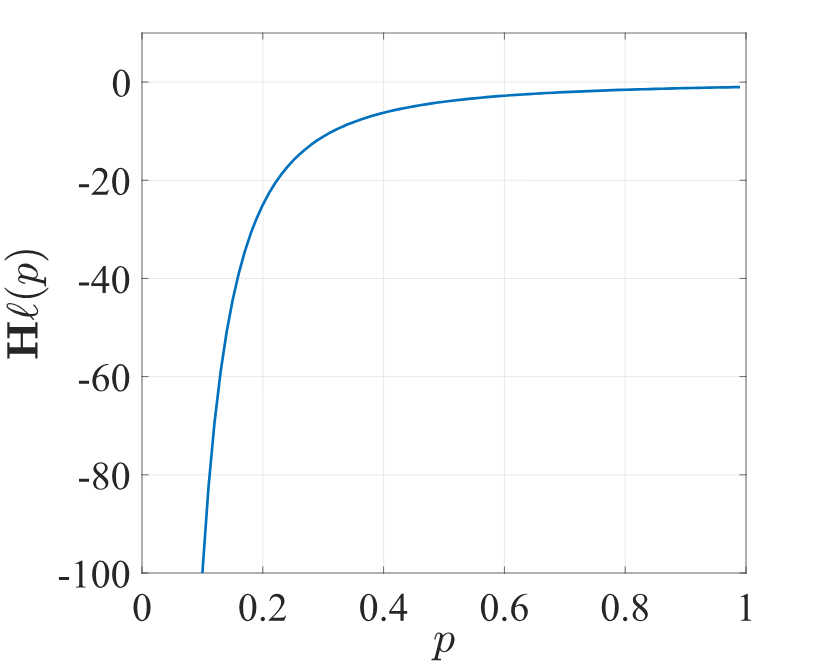

$\ell ^{\prime \prime }(p)$ for the Bernoulli statistical model with parameter $p \in (0,1)$ for $X=1$ (top) and $X=1$ (bottom).

The asymptotic normality of the ML estimator , which will be discussed in the upcoming video, depends upon the Fisher information. For a one-parameter model (like the exponential and Bernoulli), the asymptotic normality result will say something along the lines of following: that the asymptotic variance of the ML estimator is inversely proportional to the value of Fisher information at the true parameter $\theta^*$ of the statistical model. This means that if the value of Fisher information at $\theta^*$ is high, then the asymptotic variance of the ML estimator for the statistical model will be low.

Теорема
Допустим у нас есть $\theta^*\in\Theta$ - истинный параметр. Предположим следующее условия, которые в целом говорят нас что стат. модель well-behaved:
1. Параметры определяемы
2. для всех $\theta\in\Theta$, поддержка для $\mathbb{P}_\theta$ не зависит от $\theta$ - это важно потому что мы можем подсчитать Quadratic Risk, но у него нет асимптотической нормальности. По факту это даже лучше чем асимп. нормальность. Асим. Норм. из $n$ наблюдений дает нам скорость схождения в $\sqrt{n}$
3. $\theta^*$ на находится на границе $\Theta$
4. $\mathcal{I}(\theta)\neq0$ в области $\theta^*$
5. Еще несколько технических условий.


**Связь между MLE и информацией Фишера**

1. **Метод максимального правдоподобия (MLE):**

   Метод максимального правдоподобия (Maximum Likelihood Estimation, MLE) — это метод оценки параметров распределения, при котором мы выбираем такие параметры, которые максимизируют функцию правдоподобия.

   Пусть $ X = (X_1, X_2, \ldots, X_n) $ — независимые наблюдения из распределения с плотностью вероятности $ f(x; \theta) $, где $ \theta $ — вектор неизвестных параметров. Функция правдоподобия (likelihood function) определяется как:

   $$   L(\theta; X) = \prod_{i=1}^{n} f(X_i; \theta).   $$
   В методе максимального правдоподобия мы находим оценку $ \hat{\theta} $ путем максимизации функции правдоподобия $ L(\theta; X) $ или ее логарифма $ \ell(\theta; X) = \ln L(\theta; X) $.

   Максимизация логарифмической функции правдоподобия:

   $$   \hat{\theta} = \arg\max_{\theta} \ell(\theta; X).   $$
2. **Информация Фишера:**

   Информация Фишера измеряет ожидаемую информацию, которую наблюдение $ X $ содержит о неизвестном параметре $ \theta $. Информация Фишера выражается через вторую производную логарифма функции правдоподобия:

   $$   I(\theta) = -\mathbb{E}\left[ \frac{\partial^2 \ell(\theta; X)}{\partial \theta^2} \right],   $$
   где ожидание берется по распределению $ f(X; \theta) $.

   Если $ \theta $ — вектор параметров размерности $ d $, то информация Фишера будет матрицей размерности $ d \times d $:

   $$   I(\theta) = -\mathbb{E}\left[ \frac{\partial^2 \ell(\theta; X)}{\partial \theta \partial \theta^\top} \right].   $$
3. **Связь между MLE и информацией Фишера:**

   - **Асимптотическое распределение MLE:** Согласно теореме об асимптотическом нормальном распределении оценок максимального правдоподобия, оценка $ \hat{\theta} $ при $ n \to \infty $ распределена следующим образом:

   $$   \sqrt{n} (\hat{\theta} - \theta) \xrightarrow[n\to\infty]{d} \mathcal{N}(0, \mathcal{I}^{-1}(\theta)).   $$
   - **Асимптотическая ковариационная матрица:** Это распределение указывает, что асимптотическая ковариационная матрица для оценки $ \hat{\theta} $ равна обратной матрице информации Фишера:

   $$   \mathrm{Cov}(\hat{\theta}) \approx \frac{1}{n} \mathcal{I}^{-1}(\theta).   $$
   - **Асимптотическая эффективность:** Оценка максимального правдоподобия (MLE) является асимптотически эффективной, т.е. она достигает нижней границы Крамера-Рао (Cramér-Rao Lower Bound). Это означает, что MLE использует информацию, доступную в данных, наиболее эффективно.

In [4]:
append(d, 'matrix','sqrt')

In [5]:
# neato,dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.

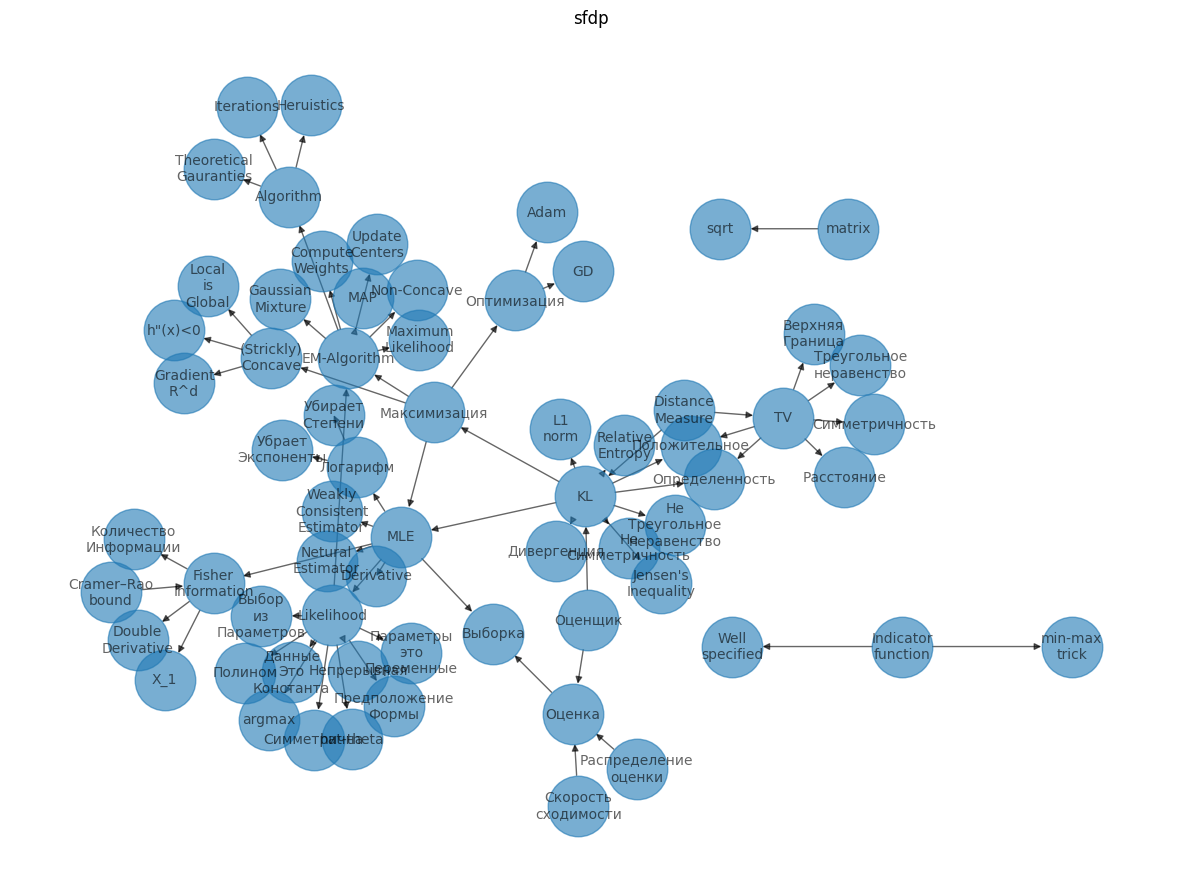

In [6]:
showg(d, figsize=(15,11), font_size=10)

progs = 'neato,dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten'
for prog in progs.split(','):
    prog = prog.strip()
    # print(prog.strip())
    try:
        print(prog)
        showg(d, figsize=(15,11), font_size=10, prog=prog)
    except:
        print('eee',prog)ь

In [7]:
save(d, '0309')

# Links

https://www.youtube.com/watch?v=DSEFA5RBzKo

https://www.youtube.com/watch?v=EkTZlxY02o4

https://gregorygundersen.com/blog/2019/11/28/asymptotic-normality-mle/
https://gregorygundersen.com/blog/2019/11/27/proof-crlb/
https://ocw.mit.edu/courses/18-443-statistics-for-applications-fall-2006/03b407da8a94b3fe22d987453807ca46_lecture3.pdf

https://www.youtube.com/watch?app=desktop&v=9YXS59yMTvI

https://stats.stackexchange.com/questions/116725/example-of-an-inconsistent-maximum-likelihood-estimator

https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Consistency

https://radfordneal.wordpress.com/2008/08/09/inconsistent-maximum-likelihood-estimation-an-ordinary-example/